In [1]:
import matplotlib.pyplot as plt
import obspy
import datetime as dt
import matplotlib.dates as mdates
import creep_event_picker as cep
import numpy as np
import pandas as pd

In [2]:
def round_to_nearest_0_3mm(value):
    return np.round(value / 0.3) * 0.3

In [6]:
path = "../../../Data/DATA_tidied/SAC/XMR1_1T.SAC"
st = obspy.read(path)
tr = st[0]
tr.interpolate(sampling_rate=tr.stats.sampling_rate)
tm = tr.times("utcdatetime")
creep = tr.data
sample_rate =  round(tr.stats.delta)/60
tm_dt = []
for w in range(len(tm)):
    tm_new = tm[w].datetime
    tm_dt.append(tm_new)
tm_int, creep_int, upsampled = cep.interpolate_linear(tm_dt,creep,'1T')



/Users/dagi9522/Library/CloudStorage/OneDrive-UCB-O365/Documents/GitHub/Creep_event_detection_scripts/Detection/creep_event_picker.py:694: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  creeping['Time'] = creeping['Time'].dt.round(sample_rate)
/Users/dagi9522/Library/CloudStorage/OneDrive-UCB-O365/Documents/GitHub/Creep_event_detection_scripts/Detection/creep_event_picker.py:698: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  upsampled = creeping.resample(sample_rate).asfreq()  # Upsample with NaNs for missing values


In [7]:
boolarr = (pd.to_datetime(tm_int)>=dt.datetime(2021,7,5,1,30,0)) & (pd.to_datetime(tm_int)<=dt.datetime(2021,7,6,1,30,0))
tm_cut  = pd.to_datetime(tm_int)[boolarr]
creep_cut  = creep_int[boolarr]
creep_cut = creep_cut-creep_cut[0]

In [8]:
tm_30 = tm_cut[::30]
creep_30 =  round_to_nearest_0_3mm(creep_cut[::30])
tm_InSAR = tm_cut[::1440]
creep_InSAR = np.floor(creep_cut[::1440])
bool_LVDT = creep_cut<=12
creep_LVDT = creep_cut[bool_LVDT]
tm_LVDT = tm_cut[bool_LVDT]

In [11]:
print(creep_30)

[0.  0.  2.7 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.3 3.3]


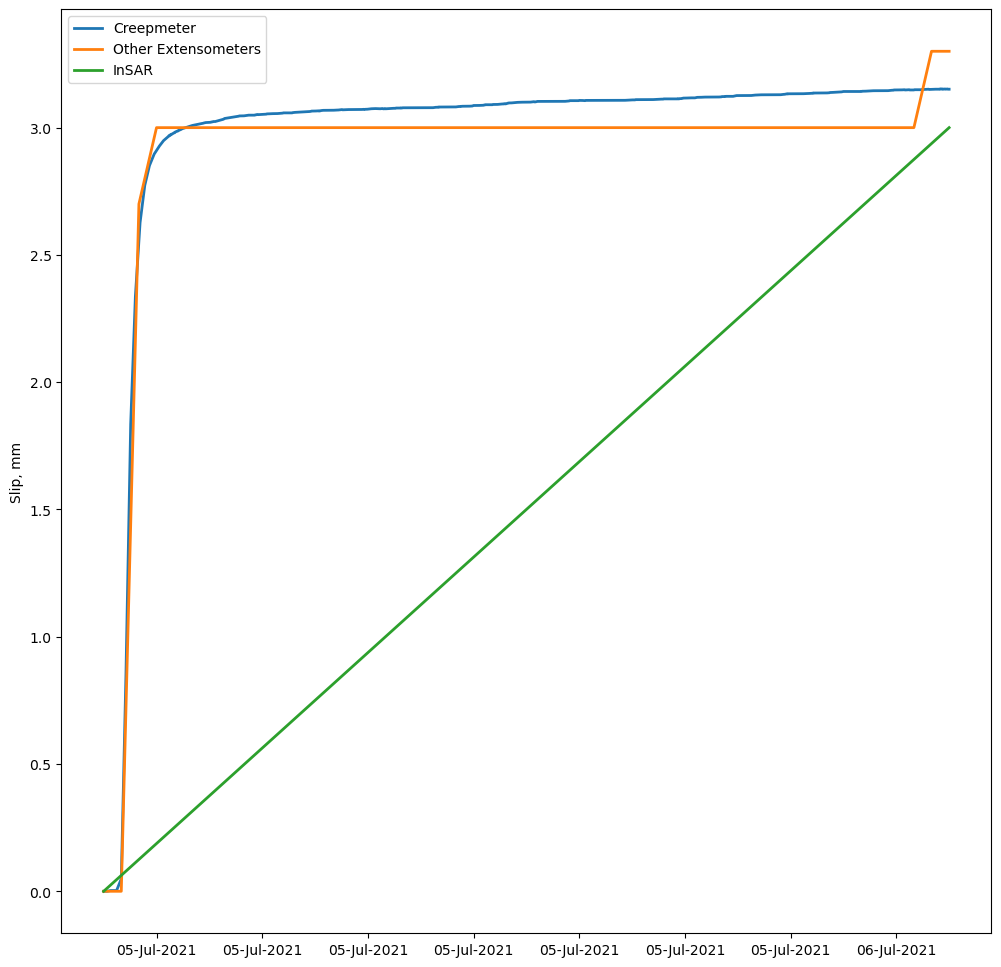

In [12]:
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1,1,1)
plt.plot(tm_cut, creep_cut,label = 'Creepmeter',linewidth=2)
plt.plot(tm_30,creep_30,label = 'Other Extensometers',linewidth=2)
plt.plot(tm_InSAR,creep_InSAR,label = 'InSAR',linewidth=2)
#plt.plot(tm_LVDT,creep_LVDT, label = 'LVDT',linewidth=2)
plt.legend()
'''plt.xticks([dt.datetime(2023,5,15),dt.datetime(2023,5,16),dt.datetime(2023,5,17),dt.datetime(2023,5,18),dt.datetime(2023,5,19),dt.datetime(2023,5,20),dt.datetime(2023,5,21),dt.datetime(2023,5,22)],
           [dt.datetime(2023,5,15),dt.datetime(2023,5,16),dt.datetime(2023,5,17),dt.datetime(2023,5,18),dt.datetime(2023,5,19),dt.datetime(2023,5,20),dt.datetime(2023,5,21),dt.datetime(2023,5,22)])
'''
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.ylabel('Slip, mm')
plt.show()

In [13]:
creep_InSAR.round()

array([0., 3.])

In [14]:
tm_cut[::1440]

DatetimeIndex(['2021-07-05 01:30:00', '2021-07-06 01:30:00'], dtype='datetime64[ns]', freq=None)

In [15]:
vel = np.diff(creep_cut) / np.diff(tm_cut).astype('timedelta64[s]').astype(float)
vel

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -1.62760417e-05,  0.00000000e+00,  0.00000000e+00])

In [16]:
import cmcrameri.cm as cmc

In [17]:
cmap = cmc.roma
colours  = cmap(np.linspace(0, 1, 4))

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_17872/2997743282.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


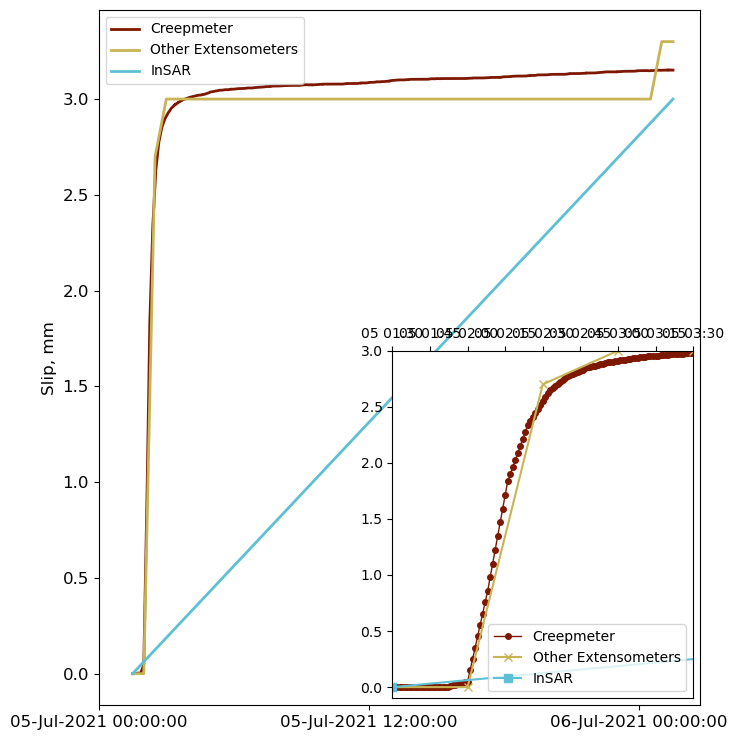

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Your original plot code
plt.close('all')
fig = plt.figure(figsize=(7.5,7.5))
ax = plt.subplot(1,1,1)
plt.plot(tm_cut, creep_cut, label='Creepmeter', linewidth=2,color=colours[0])
plt.plot(tm_30, creep_30, label='Other Extensometers', linewidth=2,color=colours[1])
plt.plot(tm_InSAR, creep_InSAR, label='InSAR', linewidth=2,color=colours[2])
#plt.plot(tm_LVDT, creep_LVDT, label='LVDT', linewidth=2,color=colours[3])
plt.legend(fontsize=10)

plt.xticks([dt.datetime(2021,7,5), dt.datetime(2021,7,5,12), dt.datetime(2021,7,6)],
           [dt.datetime(2021,7,5), dt.datetime(2021,7,5,12),dt.datetime(2021,7,6)],fontsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y %H:%M:%S'))
#rect = Rectangle((dt.datetime(2023,5,16,20), 15), dt.timedelta(hours=32), 8, linewidth=2, edgecolor='k', facecolor='none')

# Add the rectangle to the plot
#ax.add_patch(rect)

#plt.ylim([-0.1,27])
plt.ylabel('Slip, mm',fontsize=12)
plt.yticks(fontsize=12)

#Adding inset plot to the bottom-right corner
inset_ax = inset_axes(ax, width="50%", height="50%", loc="lower right")  # Adjust size and location here
inset_ax.plot(tm_cut, creep_cut, label='Creepmeter', linewidth=1,marker='o',ms=4,color=colours[0])
inset_ax.plot(tm_30, creep_30, label='Other Extensometers', linewidth=1.5,marker='x',ms=6,color=colours[1])
inset_ax.plot(tm_InSAR, creep_InSAR, label='InSAR', linewidth=1.5,marker='s',ms=6,color=colours[2])
#inset_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))

# You can adjust the ticks for the inset plot if needed
#inset_ax.set_xticks([dt.datetime(2023, 5, 17), dt.datetime(2023, 5, 18)])
inset_ax.xaxis.set_ticks_position('top')  # Move the x-ticks to the top of the inset
inset_ax.set_xlim([dt.datetime(2021,7,5,1,30),dt.datetime(2021,7,5,3,30)])
inset_ax.set_ylim([-0.1,3])
# Optional: Add legend to the inset plot
inset_ax.legend()
fig.tight_layout()
#plt.savefig('../Writing_drafts/NERC IRF/Figures/Creep_resolutions.png')
plt.show()


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_17872/613730935.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


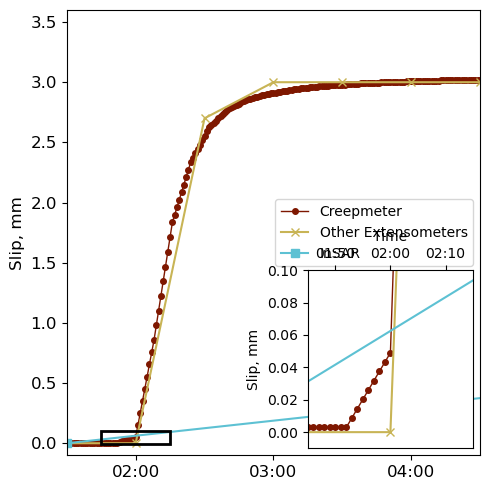

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Your original plot code
plt.close('all')
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax.plot(tm_cut, creep_cut, label='Creepmeter', linewidth=1,marker='o',ms=4,color=colours[0])
ax.plot(tm_30, creep_30, label='Other Extensometers', linewidth=1.5,marker='x',ms=6,color=colours[1])
ax.plot(tm_InSAR, creep_InSAR, label='InSAR', linewidth=1.5,marker='s',ms=6,color=colours[2])
#plt.plot(tm_LVDT, creep_LVDT, label='LVDT', linewidth=2,color=colours[3])
plt.legend(fontsize=10)
ax.set_xticks([dt.datetime(2021,7, 5,2), dt.datetime(2021,7, 5, 3), dt.datetime(2021,7, 5, 4)])
ax.set_xlim([dt.datetime(2021,7,5,1,30),dt.datetime(2021,7,5,4,30)])
ax.set_ylim([-0.1,3.6])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
rect = Rectangle((dt.datetime(2021,7,5,1,45), -0.01), dt.timedelta(minutes=30), 0.11, linewidth=2, edgecolor='k', facecolor='none',zorder=10)

# Add the rectangle to the plot
ax.add_patch(rect)

#plt.ylim([-0.1,27])
plt.ylabel('Slip, mm',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)


inset_ax.plot(tm_cut, creep_cut, label='Creepmeter', linewidth=1,marker='o',ms=4,color=colours[0])
inset_ax.plot(tm_30, creep_30, label='Other Extensometers', linewidth=1.5,marker='x',ms=6,color=colours[1])
inset_ax.plot(tm_InSAR, creep_InSAR, label='InSAR', linewidth=1.5,marker='s',ms=6,color=colours[2])
#inset_ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))

# You can adjust the ticks for the inset plot if needed
#inset_ax.set_xticks([dt.datetime(2023, 5, 17), dt.datetime(2023, 5, 18)])
inset_ax.xaxis.set_ticks_position('top')  # Move the x-ticks to the top of the inset

# Optional: Add legend to the inset plot
inset_ax.legend()
#Adding inset plot to the bottom-right corner
inset_ax = inset_axes(ax, width="40%", height="40%", loc="lower right")  # Adjust size and location here
inset_ax.plot(tm_cut, creep_cut, label='Creepmeter', linewidth=1,marker='o',ms=4,color=colours[0])
inset_ax.plot(tm_30, creep_30, label='Other Extensometers', linewidth=1.5,marker='x',ms=6,color=colours[1])
inset_ax.plot(tm_InSAR, creep_InSAR, label='InSAR', linewidth=1.5,marker='s',ms=6,color=colours[2])
inset_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
inset_ax.set_xticks([dt.datetime(2021,7,5,1,50), dt.datetime(2021,7, 5, 2),dt.datetime(2021,7, 5, 2,10)])

# You can adjust the ticks for the inset plot if needed
#inset_ax.set_xticks([dt.datetime(2023, 5, 17), dt.datetime(2023, 5, 18)])
inset_ax.xaxis.set_ticks_position('top')  # Move the x-ticks to the top of the inset
inset_ax.set_xlim([dt.datetime(2021,7,5,1,45),dt.datetime(2021,7,5,2,15)])
inset_ax.set_ylim([-0.01,0.1])
inset_ax.set_xlabel('Time')
inset_ax.xaxis.set_label_position('top')
inset_ax.set_ylabel('Slip, mm')
# Optional: Add legend to the inset plot
#inset_ax.legend()



fig.tight_layout()
plt.savefig('../../Writing_drafts/NERC IRF/Figures/Creep_resolutions.pdf')
plt.show()


